[Dataset reference](https://www.kaggle.com/datasets/andrewmvd/face-mask-detection)

### Imports

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import os
import glob
import xmltodict
from collections import Counter

### Inspect the files

In [15]:
# The files have an annotation and images folder
# Store the image and annotation names in two separate lists

image_list = list()
annot_list = list()

for dir_name, _, file_name in os.walk('./data/'):
    for file in file_name:
        if file[-4:] == '.png':
            image_list.append(file)
            
        elif file[-4:] == '.xml':
            annot_list.append(file)


### EDA

#### Distribution of the classes

In [16]:
# Get a distribution of the dataset

classes = list()

annotation_dir = './data/annotations/'
for image in image_list:
    with open(annotation_dir + image[:-4] + '.xml') as xml_doc:
        doc = xmltodict.parse(xml_doc.read())
    
    tmp = doc['annotation']['object']

    if type(tmp) == list:
        
        for i in range(len(tmp)):
            classes.append(tmp[i]['name'])
    else:
        classes.append(tmp['name'])
        
class_dict = dict(Counter(classes))
print(class_dict)

{'with_mask': 3232, 'mask_weared_incorrect': 123, 'without_mask': 717}


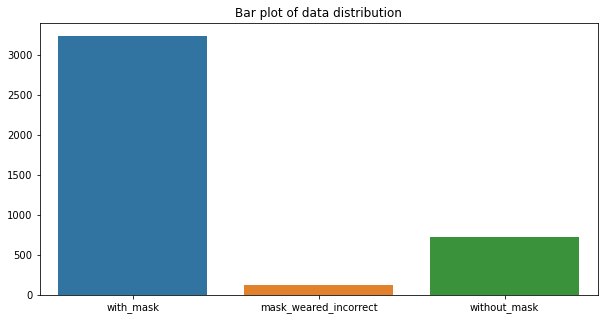

In [17]:
class_labels = Counter(classes).keys()
class_values = Counter(classes).values()

plt.figure(figsize=(10, 5))
plt.title('Bar plot of data distribution')
sns.barplot(x=list(class_labels), y=list(class_values))
plt.show()

#### View images with annotation

In [18]:
def show_images(img_name:str):
    
    image_path = './data/images/'
    xml_path = './data/annotations/'
    
    # Get xml data
    with open(xml_path + img_name[:-4] + '.xml') as xml:
        xml_doc = xmltodict.parse(xml.read())
        
    # Get image data
    fig, ax = plt.subplots(1)
    fig.set_size_inches(18.5, 10.5)
    
    # Get the image data for plotting
    img_plot = plt.imread(image_path + img_name)   
    
    # Get the xml data inside the converted xml
    xml_data = xml_doc['annotation']['object']   
    
    # Get all the annotated values and add it to the current image
    if type(xml_data) == list:
        
        for i in range(len(xml_data)):
            
            if xml_data[i]['name'] == 'with_mask':
                x, y, w, h = list(map(int, xml_data[i]['bndbox'].values()))
                bbox = mpatches.Rectangle((x, y), w-x, h-y, edgecolor = 'g', facecolor='none', lw = 3)
                ax.add_patch(bbox)
                annot_x, annot_y = bbox.get_xy()
                ax.annotate('with_mask', (annot_x, annot_y), color = 'g', weight = 'bold', fontsize= 12)
                
            if xml_data[i]['name'] == 'without_mask':
                x, y, w, h = list(map(int, xml_data[i]['bndbox'].values()))
                bbox = mpatches.Rectangle((x, y), w-x, h-y, edgecolor = 'r', facecolor='none', lw = 3)
                ax.add_patch(bbox)
                annot_x, annot_y = bbox.get_xy()
                ax.annotate('without_mask', (annot_x, annot_y), color = 'r', weight = 'bold', fontsize= 12)
                
            if xml_data[i]['name'] == 'mask_weared_incorrect':
                x, y, w, h = list(map(int, xml_data[i]['bndbox'].values()))
                bbox = mpatches.Rectangle((x, y), w-x, h-y, edgecolor = 'orange', facecolor='none')
                ax.add_patch(bbox)
                annot_x, annot_y = bbox.get_xy()
                ax.annotate('mask_weared_incorrect', (annot_x, annot_y), color = 'orange', weight = 'bold', fontsize= 12)
    else:
        x, y, w, h = list(map(int, xml_data['bndbox'].values()))
        box_colors ={'with_mask' :'g',
                     'without_mask' : 'r',
                     'mask_weared_incorrect' : 'orange'}
        bbox = mpatches.Rectangle((x, y), w-x, h-y, edgecolor = box_colors[xml_data['name']], facecolor = 'none')
        ax.add_patch(bbox)
        annot_x, annot_y = bbox.get_xy()
        ax.annotate(xml_data['name'], (annot_x, annot_y), color = box_colors[xml_data['name']], weight = 'bold', fontsize= 12)
        
    ax.imshow(img_plot)

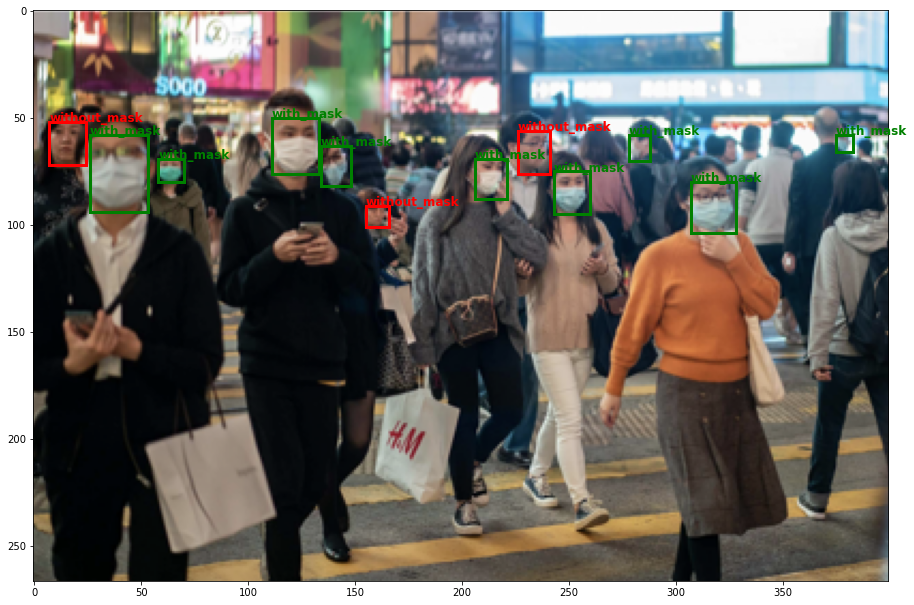

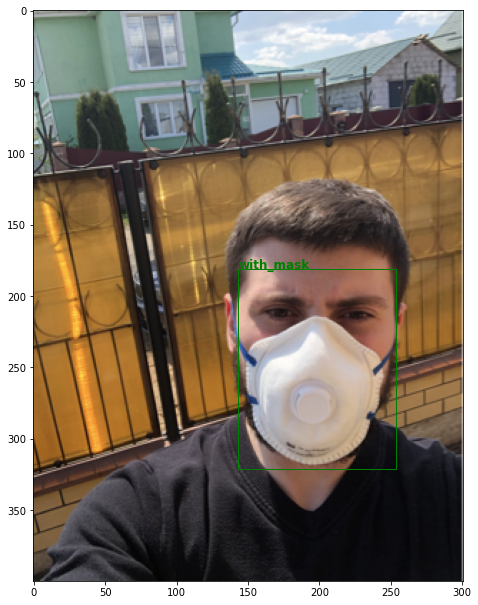

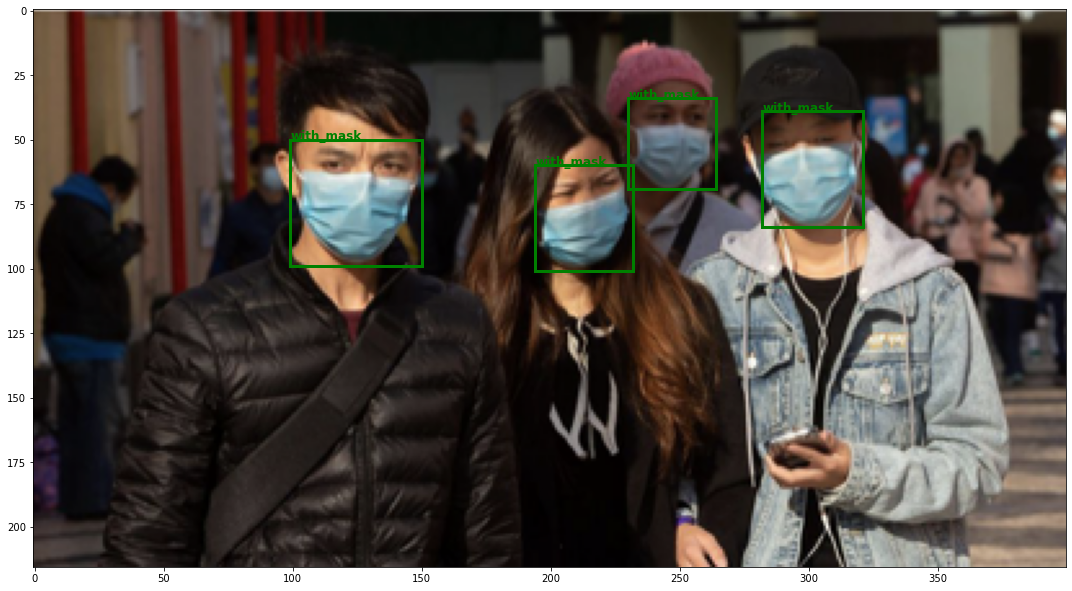

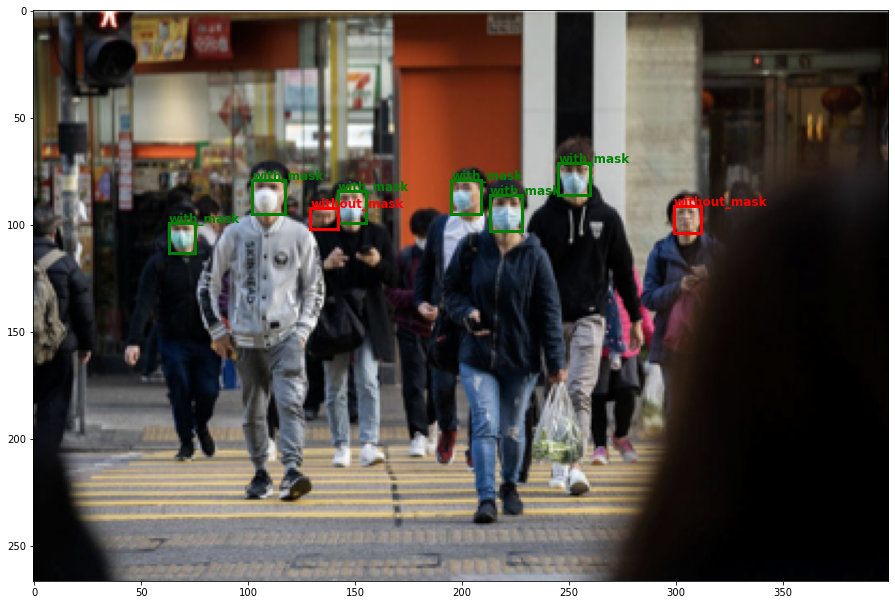

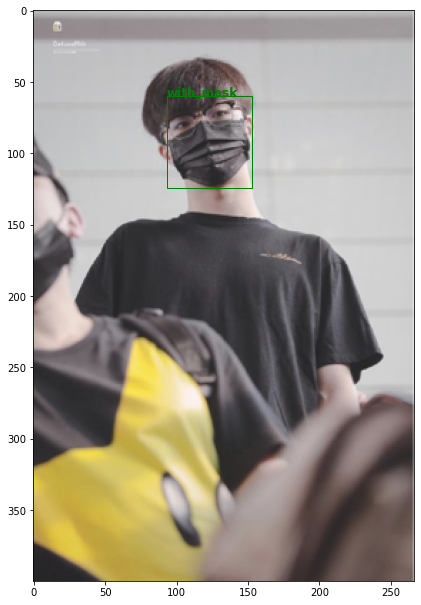

In [19]:
view_images = image_list[10:15]

for img in view_images:
    show_images(img)
    